# Testing OBIM Components

We have several basic components that need independently verifying:

1. Rig Oscillators and Inverter Coupling Loops
2. The Oscillator Array
3. The AND Gate
4. The Half-Adder Gate
5. The Full-Adder Gate
6. Digital -> Oscillator Converter (DOC)
7. Oscillator -> Digital Converter (ODC)

For each component, we'd like to test to the following:

1. The internal structure of the Hdl21 `Instance`.
2. The component is working correctly in simulation.
3. That components *can* be integrated together.

### Inverter Coupling Loop

In [1]:
from ro import *
from ogates import *
from io_osc import *
import hdl21 as h

test = gen_coupling(width=2)
h.elaborate(test)
test = test.result

test.instances

{'loop_arr_0': Instance(name=loop_arr_0 of=Module(name=invloop)),
 'loop_arr_1': Instance(name=loop_arr_1 of=Module(name=invloop))}

In [2]:
test.ports

{'A': Signal(name='A', width=1, desc=None),
 'B': Signal(name='B', width=1, desc=None),
 'VDD': Signal(name='VDD', width=1, desc=None),
 'VSS': Signal(name='VSS', width=1, desc=None)}

In [3]:
test.loop_arr_1.conns

{'A': Signal(name='A', width=1, desc=None),
 'B': Signal(name='B', width=1, desc=None),
 'VDD': Signal(name='VDD', width=1, desc=None),
 'VSS': Signal(name='VSS', width=1, desc=None)}

### Base Ring Oscillator

In [4]:
test = genRO(stages=3)
h.elaborate(test)
test = test.result 

test.instances

{'stage0': Instance(name=stage0 of=ExternalModuleCall(module=ExternalModule(name='sky130_fd_sc_hd__inv_4', port_list=[Signal(name='A', width=1, desc=None), Signal(name='VGND', width=1, desc=None), Signal(name='VNB', width=1, desc=None), Signal(name='VPB', width=1, desc=None), Signal(name='VPWR', width=1, desc=None), Signal(name='Y', width=1, desc=None)], paramtype=<class 'sky130_hdl21.pdk_data.Sky130LogicParams'>, desc='High Density sky130_fd_sc_hd__inv_4 Logic Circuit', domain='sky130', spicetype=<SpiceType.SUBCKT: 'x'>), params=Sky130LogicParams(m=1*UNIT))),
 'stage1': Instance(name=stage1 of=ExternalModuleCall(module=ExternalModule(name='sky130_fd_sc_hd__inv_4', port_list=[Signal(name='A', width=1, desc=None), Signal(name='VGND', width=1, desc=None), Signal(name='VNB', width=1, desc=None), Signal(name='VPB', width=1, desc=None), Signal(name='VPWR', width=1, desc=None), Signal(name='Y', width=1, desc=None)], paramtype=<class 'sky130_hdl21.pdk_data.Sky130LogicParams'>, desc='High Dens

In [5]:
test.ports

{'links': Signal(name='links', width=3, desc='Oscillator output'),
 'VSS': Signal(name='VSS', width=1, desc=None),
 'VDD': Signal(name='VDD', width=1, desc=None),
 'EN': Signal(name='EN', width=1, desc=None)}

In [6]:
test.stage0.conns

{'A': Slice(parent=Signal(name='links', width=3, desc='Oscillator output'), index=0),
 'Y': Slice(parent=Signal(name='links', width=3, desc='Oscillator output'), index=1),
 'VGND': Signal(name='VSS', width=1, desc=None),
 'VNB': Signal(name='VSS', width=1, desc=None),
 'VPWR': Signal(name='VDD', width=1, desc=None),
 'VPB': Signal(name='VDD', width=1, desc=None)}

In [7]:
test.stage1.conns

{'A': Slice(parent=Signal(name='links', width=3, desc='Oscillator output'), index=1),
 'Y': Slice(parent=Signal(name='links', width=3, desc='Oscillator output'), index=2),
 'VGND': Signal(name='VSS', width=1, desc=None),
 'VNB': Signal(name='VSS', width=1, desc=None),
 'VPWR': Signal(name='VDD', width=1, desc=None),
 'VPB': Signal(name='VDD', width=1, desc=None)}

In [8]:
test.stage2.conns

{'A': Slice(parent=Signal(name='links', width=3, desc='Oscillator output'), index=-1),
 'B': Signal(name='EN', width=1, desc=None),
 'Y': Slice(parent=Signal(name='links', width=3, desc='Oscillator output'), index=0),
 'VGND': Signal(name='VSS', width=1, desc=None),
 'VNB': Signal(name='VSS', width=1, desc=None),
 'VPWR': Signal(name='VDD', width=1, desc=None),
 'VPB': Signal(name='VDD', width=1, desc=None)}

### Oscillator Array

In [9]:
test = gen_ro_arr(stages=3, rows=3)
h.elaborate(test)
test = test.result

test.instances

{'rosc0': Instance(name=rosc0 of=GeneratorCall(gen=genRO)),
 'rosc1': Instance(name=rosc1 of=GeneratorCall(gen=genRO)),
 'rosc2': Instance(name=rosc2 of=GeneratorCall(gen=genRO)),
 'arr_io': Instance(name=arr_io of=Module(name=arr_io22))}

In [10]:
test.ports

{'VDD': Signal(name='VDD', width=1, desc=None),
 'VSS': Signal(name='VSS', width=1, desc=None),
 'EN': Signal(name='EN', width=1, desc=None),
 'links': Signal(name='links', width=9, desc=None)}

In [11]:
test.rosc2.conns

{'links': Slice(parent=Signal(name='links', width=9, desc=None), index=slice(6, 9, None)),
 'EN': Signal(name='EN', width=1, desc=None),
 'VSS': Signal(name='VSS', width=1, desc=None),
 'VDD': Signal(name='VDD', width=1, desc=None)}

In [12]:
test.arr_io.conns

{'REF': Slice(parent=Signal(name='links', width=9, desc=None), index=-1)}

### AND Gate

In [13]:
test = oAND
h.elaborate(test)
test = test.result

test.instances

{'AND_ogate': Instance(name=AND_ogate of=Module(name=AND))}

In [14]:
test.ports

{'VDD': Signal(name='VDD', width=1, desc=None),
 'VSS': Signal(name='VSS', width=1, desc=None),
 'EN': Signal(name='EN', width=1, desc=None),
 'REF': Signal(name='REF', width=1, desc=None),
 'Ai': Signal(name='Ai', width=1, desc=None),
 'Ao': Signal(name='Ao', width=1, desc=None),
 'Bi': Signal(name='Bi', width=1, desc=None),
 'Bo': Signal(name='Bo', width=1, desc=None),
 'Ci': Signal(name='Ci', width=1, desc=None),
 'Co': Signal(name='Co', width=1, desc=None)}

In [15]:
test.instances['AND_ogate'].conns['links'].parts

(Signal(name='kernel', width=1, desc=None),
 Signal(name='padding0', width=4, desc=None),
 Signal(name='Ai', width=1, desc=None),
 Signal(name='Ao', width=1, desc=None),
 Signal(name='padding1', width=5, desc=None),
 Signal(name='Bi', width=1, desc=None),
 Signal(name='Bo', width=1, desc=None),
 Signal(name='padding2', width=5, desc=None),
 Signal(name='Ci', width=1, desc=None),
 Signal(name='Co', width=1, desc=None),
 Signal(name='padding3', width=5, desc=None),
 Signal(name='REF', width=1, desc=None),
 Signal(name='dummy', width=1, desc=None))

### Half-Adder Gate

In [16]:
test = oHA
h.elaborate(test)
test = test.result

test.instances

{'HA_ogate': Instance(name=HA_ogate of=Module(name=HA))}

In [17]:
test.ports

{'VDD': Signal(name='VDD', width=1, desc=None),
 'VSS': Signal(name='VSS', width=1, desc=None),
 'EN': Signal(name='EN', width=1, desc=None),
 'REF': Signal(name='REF', width=1, desc=None),
 'Ai': Signal(name='Ai', width=1, desc=None),
 'Ao': Signal(name='Ao', width=1, desc=None),
 'Bi': Signal(name='Bi', width=1, desc=None),
 'Bo': Signal(name='Bo', width=1, desc=None),
 'Si': Signal(name='Si', width=1, desc=None),
 'So': Signal(name='So', width=1, desc=None),
 'Ci': Signal(name='Ci', width=1, desc=None),
 'Co': Signal(name='Co', width=1, desc=None)}

In [18]:
test.instances['HA_ogate'].conns['links'].parts

(Signal(name='kernel', width=1, desc=None),
 Signal(name='padding0', width=4, desc=None),
 Signal(name='Ai', width=1, desc=None),
 Signal(name='Ao', width=1, desc=None),
 Signal(name='padding1', width=5, desc=None),
 Signal(name='Bi', width=1, desc=None),
 Signal(name='Bo', width=1, desc=None),
 Signal(name='padding2', width=5, desc=None),
 Signal(name='Si', width=1, desc=None),
 Signal(name='So', width=1, desc=None),
 Signal(name='padding3', width=5, desc=None),
 Signal(name='Ci', width=1, desc=None),
 Signal(name='Co', width=1, desc=None),
 Signal(name='padding4', width=5, desc=None),
 Signal(name='REF', width=1, desc=None),
 Signal(name='dummy', width=1, desc=None))

### Full-Adder Gate

In [19]:
test = oFA
h.elaborate(test)
test = test.result

In [20]:
test.instances

{'FA_ogate': Instance(name=FA_ogate of=Module(name=FA))}

In [21]:
test.ports

{'VDD': Signal(name='VDD', width=1, desc=None),
 'VSS': Signal(name='VSS', width=1, desc=None),
 'EN': Signal(name='EN', width=1, desc=None),
 'REF': Signal(name='REF', width=1, desc=None),
 'Ai': Signal(name='Ai', width=1, desc=None),
 'Ao': Signal(name='Ao', width=1, desc=None),
 'Bi': Signal(name='Bi', width=1, desc=None),
 'Bo': Signal(name='Bo', width=1, desc=None),
 'Cini': Signal(name='Cini', width=1, desc=None),
 'Cino': Signal(name='Cino', width=1, desc=None),
 'Si': Signal(name='Si', width=1, desc=None),
 'So': Signal(name='So', width=1, desc=None),
 'Couti': Signal(name='Couti', width=1, desc=None),
 'Couto': Signal(name='Couto', width=1, desc=None)}

In [22]:
test.instances['FA_ogate'].conns['links'].parts

(Signal(name='kernel', width=1, desc=None),
 Signal(name='padding0', width=4, desc=None),
 Signal(name='Ai', width=1, desc=None),
 Signal(name='Ao', width=1, desc=None),
 Signal(name='padding1', width=5, desc=None),
 Signal(name='Bi', width=1, desc=None),
 Signal(name='Bo', width=1, desc=None),
 Signal(name='padding2', width=5, desc=None),
 Signal(name='Cini', width=1, desc=None),
 Signal(name='Cino', width=1, desc=None),
 Signal(name='padding3', width=5, desc=None),
 Signal(name='Si', width=1, desc=None),
 Signal(name='So', width=1, desc=None),
 Signal(name='padding4', width=5, desc=None),
 Signal(name='Couti', width=1, desc=None),
 Signal(name='Couto', width=1, desc=None),
 Signal(name='padding5', width=5, desc=None),
 Signal(name='REF', width=1, desc=None),
 Signal(name='dummy', width=1, desc=None))

### Digital -> Oscillator Converter (DOC)

In [23]:
test = gen_in_osc(stages=7, n_bits=3)
h.elaborate(test)
test = test.result

test.instances

{'in_final_buf': Instance(name=in_final_buf of=ExternalModuleCall(module=ExternalModule(name='sky130_fd_sc_hd__buf_4', port_list=[Signal(name='A', width=1, desc=None), Signal(name='VGND', width=1, desc=None), Signal(name='VNB', width=1, desc=None), Signal(name='VPB', width=1, desc=None), Signal(name='VPWR', width=1, desc=None), Signal(name='X', width=1, desc=None)], paramtype=<class 'sky130_hdl21.pdk_data.Sky130LogicParams'>, desc='High Density sky130_fd_sc_hd__buf_4 Logic Circuit', domain='sky130', spicetype=<SpiceType.SUBCKT: 'x'>), params=Sky130LogicParams(m=1*UNIT))),
 'in_xor1': Instance(name=in_xor1 of=ExternalModuleCall(module=ExternalModule(name='sky130_fd_sc_hd__xor2_4', port_list=[Signal(name='A', width=1, desc=None), Signal(name='B', width=1, desc=None), Signal(name='VGND', width=1, desc=None), Signal(name='VNB', width=1, desc=None), Signal(name='VPB', width=1, desc=None), Signal(name='VPWR', width=1, desc=None), Signal(name='X', width=1, desc=None)], paramtype=<class 'sky13

In [24]:
test.ports, test.signals

({'IN': Signal(name='IN', width=3, desc=None),
  'OUT': Signal(name='OUT', width=3, desc=None),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1, desc=None),
  'EN': Signal(name='EN', width=1, desc=None),
  'REF': Signal(name='REF', width=1, desc=None)},
 {'OSC_CTRL': Signal(name='OSC_CTRL', width=3, desc=None),
  'OSC_CTRL_B': Signal(name='OSC_CTRL_B', width=3, desc=None),
  'osc_arr_links': Signal(name='osc_arr_links', width=28, desc=None)})

In [25]:
test.osc_arr.of.result.instances

{'rosc0': Instance(name=rosc0 of=GeneratorCall(gen=genRO)),
 'rosc1': Instance(name=rosc1 of=GeneratorCall(gen=genRO)),
 'rosc2': Instance(name=rosc2 of=GeneratorCall(gen=genRO)),
 'rosc3': Instance(name=rosc3 of=GeneratorCall(gen=genRO)),
 'arr_io': Instance(name=arr_io of=Module(name=arr_io754))}

In [26]:
test.in_xor1.conns, test.in_xor2.conns, test.in_final_buf.conns

({'A': Slice(parent=Signal(name='IN', width=3, desc=None), index=0),
  'B': Slice(parent=Signal(name='IN', width=3, desc=None), index=1),
  'X': Slice(parent=Signal(name='OSC_CTRL', width=3, desc=None), index=0),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, desc=None),
  'VPWR': Signal(name='VDD', width=1, desc=None),
  'VPB': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='IN', width=3, desc=None), index=1),
  'B': Slice(parent=Signal(name='IN', width=3, desc=None), index=2),
  'X': Slice(parent=Signal(name='OSC_CTRL', width=3, desc=None), index=1),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, desc=None),
  'VPWR': Signal(name='VDD', width=1, desc=None),
  'VPB': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='IN', width=3, desc=None), index=-1),
  'X': Slice(parent=Signal(name='OSC_CTRL', width=3, desc=None), index=-1),
  'VGND': Signal(name='VSS', w

In [27]:
test.einvp0.conns, test.einvp1.conns, test.einvp2.conns

({'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=0),
  'B': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=7),
  'EN': Slice(parent=Signal(name='OSC_CTRL', width=3, desc=None), index=0),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=8),
  'B': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=15),
  'EN': Slice(parent=Signal(name='OSC_CTRL', width=3, desc=None), index=1),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=14),
  'B': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=21),
  'EN': Slice(parent=Signal(name='OSC_CTRL', width=3, desc=None), index=2),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1,

In [28]:
test.einvn0.conns, test.einvn1.conns, test.einvn2.conns

({'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=2),
  'B': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=10),
  'EN': Slice(parent=Signal(name='OSC_CTRL_B', width=3, desc=None), index=0),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=9),
  'B': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=17),
  'EN': Slice(parent=Signal(name='OSC_CTRL_B', width=3, desc=None), index=1),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=16),
  'B': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=24),
  'EN': Slice(parent=Signal(name='OSC_CTRL_B', width=3, desc=None), index=2),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', w

In [29]:
test.outbuf0.conns, test.outbuf1.conns, test.outbuf2.conns

({'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=6),
  'X': Slice(parent=Signal(name='OUT', width=3, desc=None), index=0),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, desc=None),
  'VPWR': Signal(name='VDD', width=1, desc=None),
  'VPB': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=13),
  'X': Slice(parent=Signal(name='OUT', width=3, desc=None), index=1),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, desc=None),
  'VPWR': Signal(name='VDD', width=1, desc=None),
  'VPB': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=20),
  'X': Slice(parent=Signal(name='OUT', width=3, desc=None), index=2),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, desc=None),
  'VPWR': Signal(name='VDD', width=1, desc=None)

### Oscillator -> Digital Converter (ODC)

In [30]:
test = gen_out_osc(stages=7, n_bits=3)
h.elaborate(test)
test = test.result

test.instances

{'buf0': Instance(name=buf0 of=ExternalModuleCall(module=ExternalModule(name='sky130_fd_sc_hd__buf_4', port_list=[Signal(name='A', width=1, desc=None), Signal(name='VGND', width=1, desc=None), Signal(name='VNB', width=1, desc=None), Signal(name='VPB', width=1, desc=None), Signal(name='VPWR', width=1, desc=None), Signal(name='X', width=1, desc=None)], paramtype=<class 'sky130_hdl21.pdk_data.Sky130LogicParams'>, desc='High Density sky130_fd_sc_hd__buf_4 Logic Circuit', domain='sky130', spicetype=<SpiceType.SUBCKT: 'x'>), params=Sky130LogicParams(m=1*UNIT))),
 'buf1': Instance(name=buf1 of=ExternalModuleCall(module=ExternalModule(name='sky130_fd_sc_hd__buf_4', port_list=[Signal(name='A', width=1, desc=None), Signal(name='VGND', width=1, desc=None), Signal(name='VNB', width=1, desc=None), Signal(name='VPB', width=1, desc=None), Signal(name='VPWR', width=1, desc=None), Signal(name='X', width=1, desc=None)], paramtype=<class 'sky130_hdl21.pdk_data.Sky130LogicParams'>, desc='High Density sky1

In [31]:
test.ports, test.signals

({'IN': Signal(name='IN', width=3, desc=None),
  'REF': Signal(name='REF', width=1, desc=None),
  'OUT': Signal(name='OUT', width=3, desc=None),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1, desc=None),
  'CLK': Signal(name='CLK', width=1, desc=None)},
 {'XORS': Signal(name='XORS', width=3, desc=None),
  'FF': Signal(name='FF', width=3, desc=None)})

In [32]:
test.buf0.conns, test.xor0.conns, test.ff0.conns

({'A': Slice(parent=Signal(name='IN', width=3, desc=None), index=0),
  'X': Slice(parent=Signal(name='XORS', width=3, desc=None), index=0),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, desc=None),
  'VPWR': Signal(name='VDD', width=1, desc=None),
  'VPB': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='XORS', width=3, desc=None), index=0),
  'B': Signal(name='REF', width=1, desc=None),
  'X': Slice(parent=Signal(name='FF', width=3, desc=None), index=0),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, desc=None),
  'VPWR': Signal(name='VDD', width=1, desc=None),
  'VPB': Signal(name='VDD', width=1, desc=None)},
 {'D': Slice(parent=Signal(name='FF', width=3, desc=None), index=0),
  'Q': Slice(parent=Signal(name='OUT', width=3, desc=None), index=0),
  'CLK': Signal(name='CLK', width=1, desc=None),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, 

### Simulation

For the purposes of simulation and minor integration testing, we'll only be creating the following testbeches:

1. DOC -> oAND -> ODC
2. DOC -> oHA -> ODC
3. DOC -> oFA -> ODC

We'll be testing each in its typical and reversed configuration to demonstrate that these can function as both logic gates and their inverted probabilistic counterparts. We would also like to simulate the effects of mismatch, noise and temperature on how our components function.

### AND Gate

In [33]:
from ogates import *
from io_osc import *
import sky130_hdl21 as sky130
from sitepdks import *
import vlsirtools.spice as vsp
import hdl21 as h
from hdl21.prefix import n, p

@h.sim.sim
class oAND_Sim:

    @h.module
    class Tb:

        # Instantiate power supplies, enable signal and reference signal
        VSS = h.Port()
        VDD = h.Signal()
        v = h.Vdc(dc=1.8)(p=VDD, n=VSS)
        EN = h.Signal()
        ven  = h.PulseVoltageSource(
            delay=0,
            v1=0,
            v2=1.8,
            period=0,
            rise=10*n,
            fall=1*n,
            width=1
        )(p=EN,n=VSS)
        CLK = h.Signal()
        vclk = h.PulseVoltageSource(
            delay=90*n,
            v1=0,
            v2=1.8,
            period=0,
            rise=10*n,
            fall=1*n,
            width=1
        )(p=CLK,n=VSS)
        REF = h.Signal()
        vout = h.Signal(width=1)

        stages = 7

        # Instantiate input vsources and oscillators and output phase detector
        DIGITAL_IN = digital_signal(width=2,inp=2)(VSS=VSS)
        IN  = gen_in_osc(stages=stages, n_bits=2)(VSS=VSS, VDD=VDD,EN=EN,REF=REF,IN=DIGITAL_IN.vout)
        OUT = gen_out_osc(n_bits=1)(VSS=VSS, VDD=VDD, CLK=CLK, REF=REF, OUT=vout)

        J = ((0, -2, 4, 1), (-2, 0, 4, 1), (4, 4, 0, -2), (1, 1, -2, 0))
        nodes = ("A", "B", "C", "AUX")
        oAND = gen_ogate(stages=stages, node_names=nodes, couplings=J, gate_name="AND")

        AND = oAND(VSS=VSS,VDD=VDD,Ai=IN.OUT[0],Bi=IN.OUT[1],Ci=OUT.IN[0],REF=REF,EN=EN,
                   Ao=h.NoConn(),Bo=h.NoConn(),Co=h.NoConn())

    # Simulation Controls
    tran = h.sim.Tran(tstop=200*n, tstep=1*p)
    inc_base = sky130.install.include(h.pdk.Corner.TYP)
    inc_cells = h.sim.Include(
            sky130.install.pdk_path /
            "libs.ref/sky130_fd_sc_hd/spice/sky130_fd_sc_hd.spice"
    )

opts = vsp.SimOptions(
        simulator=vsp.SupportedSimulators.NGSPICE,
        fmt=vsp.ResultFormat.SIM_DATA,
        rundir="./scratch",
    )

rv = oAND_Sim.run(opts)
op = rv[vsp.sim_data.AnalysisType.TRAN]

In [34]:
for k in op.data.keys():
    print(k)

time
v(xtop.vdd)
v(xtop.en)
v(xtop.clk)
v(xtop.digital_in_vout_0)
v(xtop.digital_in_vout_1)
v(xtop.xin.osc_ctrl_1)
v(xtop.xin.xin_final_buf.a_27_47#)
v(xtop.xin.xin_xor1.a_806_297#)
v(xtop.xin.xin_xor1.a_112_47#)
v(xtop.xin.osc_ctrl_0)
v(xtop.xin.xin_xor1.a_27_297#)
v(xtop.xin.xin_xor1.a_806_47#)
v(xtop.xin.osc_ctrl_b_0)
v(xtop.xin.osc_ctrl_b_1)
v(xtop.xin.osc_arr_links_1)
v(xtop.xin.osc_arr_links_0)
v(xtop.xin.osc_arr_links_2)
v(xtop.xin.osc_arr_links_3)
v(xtop.xin.osc_arr_links_4)
v(xtop.xin.osc_arr_links_5)
v(xtop.xin.osc_arr_links_6)
v(xtop.xin.xosc_arr.xrosc0.xstage6.a_27_47#)
v(xtop.xin.osc_arr_links_8)
v(xtop.xin.osc_arr_links_7)
v(xtop.xin.osc_arr_links_9)
v(xtop.xin.osc_arr_links_10)
v(xtop.xin.osc_arr_links_11)
v(xtop.xin.osc_arr_links_12)
v(xtop.xin.osc_arr_links_13)
v(xtop.xin.xosc_arr.xrosc1.xstage6.a_27_47#)
v(xtop.xin.osc_arr_links_15)
v(xtop.xin.osc_arr_links_14)
v(xtop.xin.osc_arr_links_16)
v(xtop.xin.osc_arr_links_17)
v(xtop.xin.osc_arr_links_18)
v(xtop.xin.osc_arr_li

Text(0.5, 1.0, 'Control Signals')

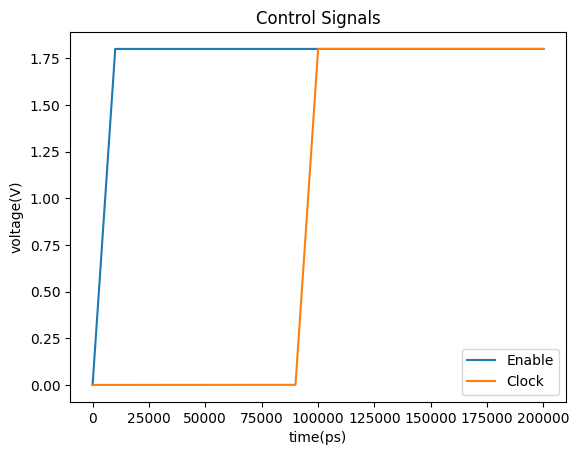

In [38]:
import matplotlib.pyplot as plt

plt.plot(op.data['v(xtop.en)'])
plt.plot(op.data['v(xtop.clk)'])
plt.legend(['Enable', 'Clock'])
plt.xlabel('time(ps)')
plt.ylabel('voltage(V)')
plt.title('Control Signals')

Text(0.5, 1.0, 'Input Oscillators')

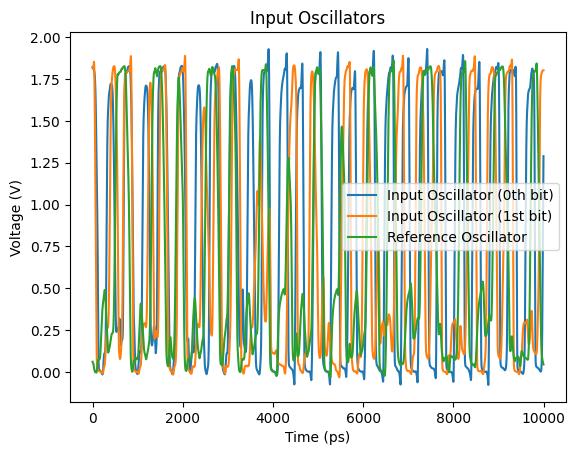

In [39]:
plt.plot(op.data['v(xtop.in_out_0)'][100000:110000])
plt.plot(op.data['v(xtop.in_out_1)'][100000:110000])
plt.plot(op.data['v(xtop.ref)'][100000:110000])
# plt.plot(op.data['v(xtop.xin)'][-10000:])
plt.xlabel('Time (ps)')
plt.ylabel('Voltage (V)')
plt.legend(['Input Oscillator (0th bit)', 'Input Oscillator (1st bit)', 'Reference Oscillator'])
plt.title('Input Oscillators')

In [40]:
plt.plot(op.data['v(xtop.xand.xand_ogate.xarr.xrosc0.xstage6.a_113_47#)'][-10000:])
plt.plot(op.data['v(xtop.xand.xand_ogate.xarr.xrosc1.xstage6.a_113_47#)'][-10000:])
plt.plot(op.data['v(xtop.xand.xand_ogate.xarr.xrosc2.xstage6.a_113_47#)'][-10000:])
plt.plot(op.data['v(xtop.xand.xand_ogate.xarr.xrosc3.xstage6.a_113_47#)'][-10000:])
plt.legend(['A', 'B', 'C', 'REF'])
plt.xlabel('Time (ps)')
plt.ylabel('Voltage (V)')
plt.title('AND Gate Output')

KeyError: 'v(xtop.xand.xand_ogate.xarr.xrosc0.xstage6.a_113_47#)'

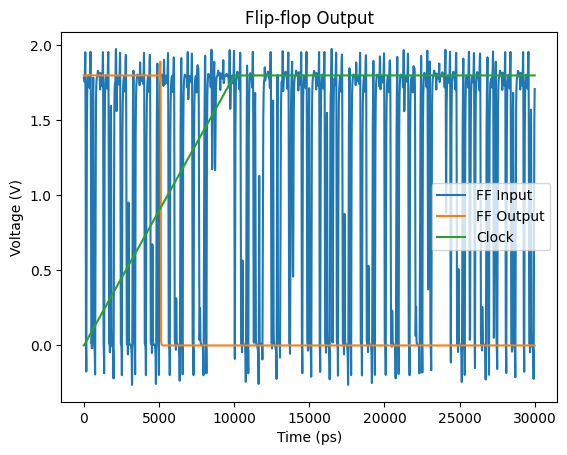

In [41]:
plt.plot(op.data['v(xtop.xout.ff)'][90000:120000])
plt.plot(op.data['v(xtop.vout)'][90000:120000])
plt.plot(op.data['v(xtop.clk)'][90000:120000])
plt.xlabel('Time (ps)')
plt.ylabel('Voltage (V)')
plt.title('Flip-flop Output')
plt.legend(['FF Input', 'FF Output', 'Clock'])

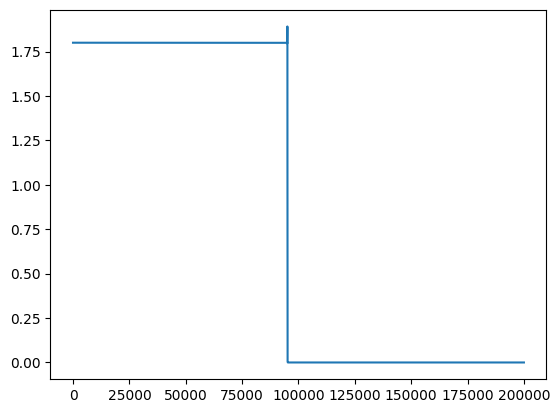

In [44]:
plt.plot(op.data['v(xtop.vout)'])
